In [81]:
# import packages and data

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
import joblib
import warnings
warnings.filterwarnings('ignore')

tr_features = pd.read_csv('./x_train_features.csv')
tr_labels = pd.read_csv('./y_train_labels.csv')


In [82]:
def print_results(results):
    print(f'Best Params: {results.best_params_}')
    
    means = results.cv_results_['mean_test_score']
    stds = results.cv_results_['std_test_score']
    
    print('Test results:')
    for mean, std, params in zip(means, stds, results.cv_results_['params']):
        print(f'{round(mean, 3)} (+/-{round(std, 3)}) for {params}')
        
        
def pkl_best_params(results, model_type: str):
    joblib.dump(results.best_estimator_, f'./{model_type}_model.pkl')
    
    
def plot_performance(results):
    means = results.cv_results_['mean_test_score']
    stds = results.cv_results_['std_test_score']
    best_est = results.best_estimator_
    columns = list(results.cv_results_)
    rows = [f'{x}' for x in results.cv_results_['params']]
    nrows = len(results.cv_results_)      
    
    
    plt.figure(figsize=(16,9))
    plt.bar(rows, means)
    plt.xticks(rotation=45, ha="right")
    
    plt.show()
    

In [83]:
lr = LogisticRegression(max_iter=500)
params = {
    'C': [0.001, 0.01, 0.1, 1, 10, 100, 1000]
}

lr_cv = GridSearchCV(lr, params, cv=5) # creates the cross-validation object
lr_cv.fit(tr_features, tr_labels.values.ravel()) # .ravel() converts tr_labels from an object vector to an array

print_results(lr_cv)

Best Params: {'C': 10}
Test results:
0.427 (+/-0.089) for {'C': 0.001}
0.538 (+/-0.075) for {'C': 0.01}
0.854 (+/-0.104) for {'C': 0.1}
0.91 (+/-0.084) for {'C': 1}
0.944 (+/-0.086) for {'C': 10}
0.933 (+/-0.108) for {'C': 100}
0.922 (+/-0.103) for {'C': 1000}


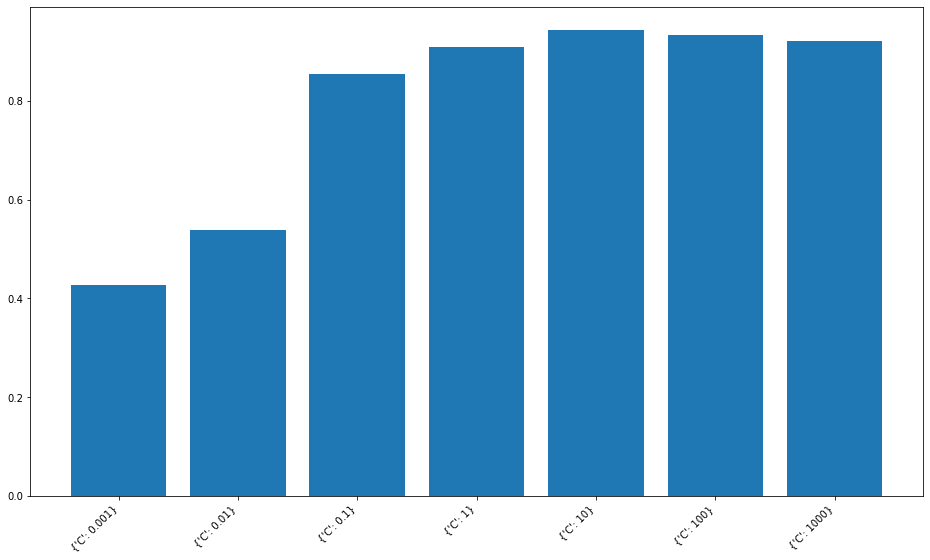

In [84]:
plot_performance(lr_cv)

In [85]:
# save best params as pkl

pkl_best_params(lr_cv, 'LR')

In [86]:
# create support vector machine model

svc = SVC()
svc_params = {
    'kernel': ['linear', 'poly', 'rbf', 'sigmoid'],
    'C': [0.1, 1, 10]
}

svc_cv = GridSearchCV(svc, svc_params, cv=5)
svc_cv.fit(tr_features, tr_labels.values.ravel())

print_results(svc_cv)

Best Params: {'C': 10, 'kernel': 'rbf'}
Test results:
0.765 (+/-0.146) for {'C': 0.1, 'kernel': 'linear'}
0.888 (+/-0.14) for {'C': 0.1, 'kernel': 'poly'}
0.91 (+/-0.076) for {'C': 0.1, 'kernel': 'rbf'}
0.19 (+/-0.129) for {'C': 0.1, 'kernel': 'sigmoid'}
0.932 (+/-0.09) for {'C': 1, 'kernel': 'linear'}
0.899 (+/-0.089) for {'C': 1, 'kernel': 'poly'}
0.933 (+/-0.108) for {'C': 1, 'kernel': 'rbf'}
0.224 (+/-0.126) for {'C': 1, 'kernel': 'sigmoid'}
0.922 (+/-0.103) for {'C': 10, 'kernel': 'linear'}
0.922 (+/-0.103) for {'C': 10, 'kernel': 'poly'}
0.933 (+/-0.082) for {'C': 10, 'kernel': 'rbf'}
0.135 (+/-0.046) for {'C': 10, 'kernel': 'sigmoid'}


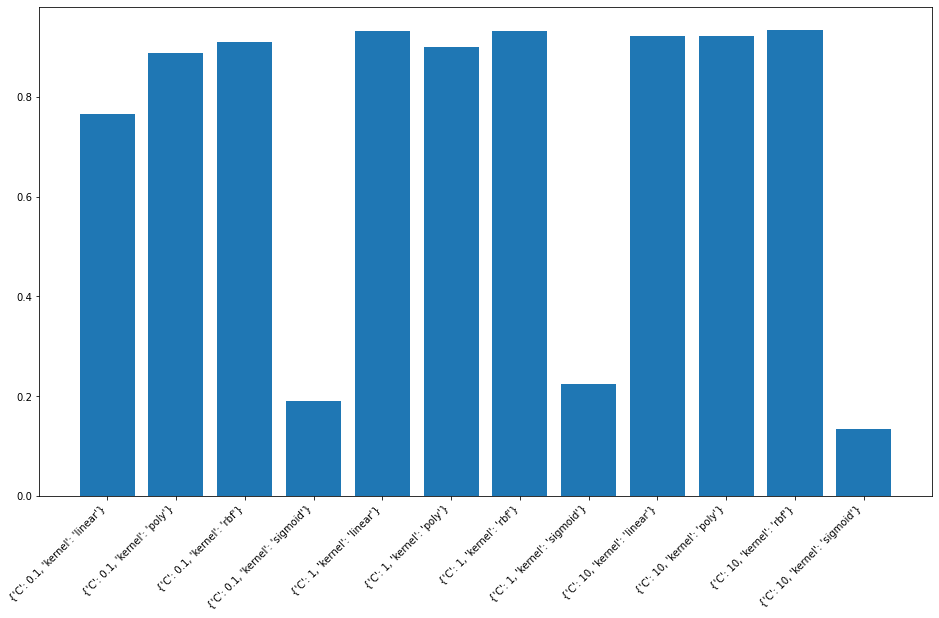

In [87]:
plot_performance(svc_cv)

In [88]:
# save best params as pkl

pkl_best_params(svc_cv, 'SVM')

In [89]:
# create multi-layer perceptron model

mlp = MLPClassifier()
mlp_params = {
    'hidden_layer_sizes':[(10,), (10,2), (50,), (100,), (500,)],
    'activation': ['relu', 'tanh', 'logistic'],
    'learning_rate': ['constant', 'invscaling', 'adaptive']
}

mlp_cv = GridSearchCV(mlp, mlp_params, cv=5)
mlp_cv.fit(tr_features, tr_labels.values.ravel())

print_results(mlp_cv)

Best Params: {'activation': 'relu', 'hidden_layer_sizes': (500,), 'learning_rate': 'constant'}
Test results:
0.629 (+/-0.223) for {'activation': 'relu', 'hidden_layer_sizes': (10,), 'learning_rate': 'constant'}
0.637 (+/-0.16) for {'activation': 'relu', 'hidden_layer_sizes': (10,), 'learning_rate': 'invscaling'}
0.648 (+/-0.188) for {'activation': 'relu', 'hidden_layer_sizes': (10,), 'learning_rate': 'adaptive'}
0.429 (+/-0.211) for {'activation': 'relu', 'hidden_layer_sizes': (10, 2), 'learning_rate': 'constant'}
0.625 (+/-0.191) for {'activation': 'relu', 'hidden_layer_sizes': (10, 2), 'learning_rate': 'invscaling'}
0.529 (+/-0.16) for {'activation': 'relu', 'hidden_layer_sizes': (10, 2), 'learning_rate': 'adaptive'}
0.899 (+/-0.089) for {'activation': 'relu', 'hidden_layer_sizes': (50,), 'learning_rate': 'constant'}
0.888 (+/-0.079) for {'activation': 'relu', 'hidden_layer_sizes': (50,), 'learning_rate': 'invscaling'}
0.888 (+/-0.105) for {'activation': 'relu', 'hidden_layer_sizes':

In [90]:
# save best params as pkl

pkl_best_params(mlp_cv, 'MLP')

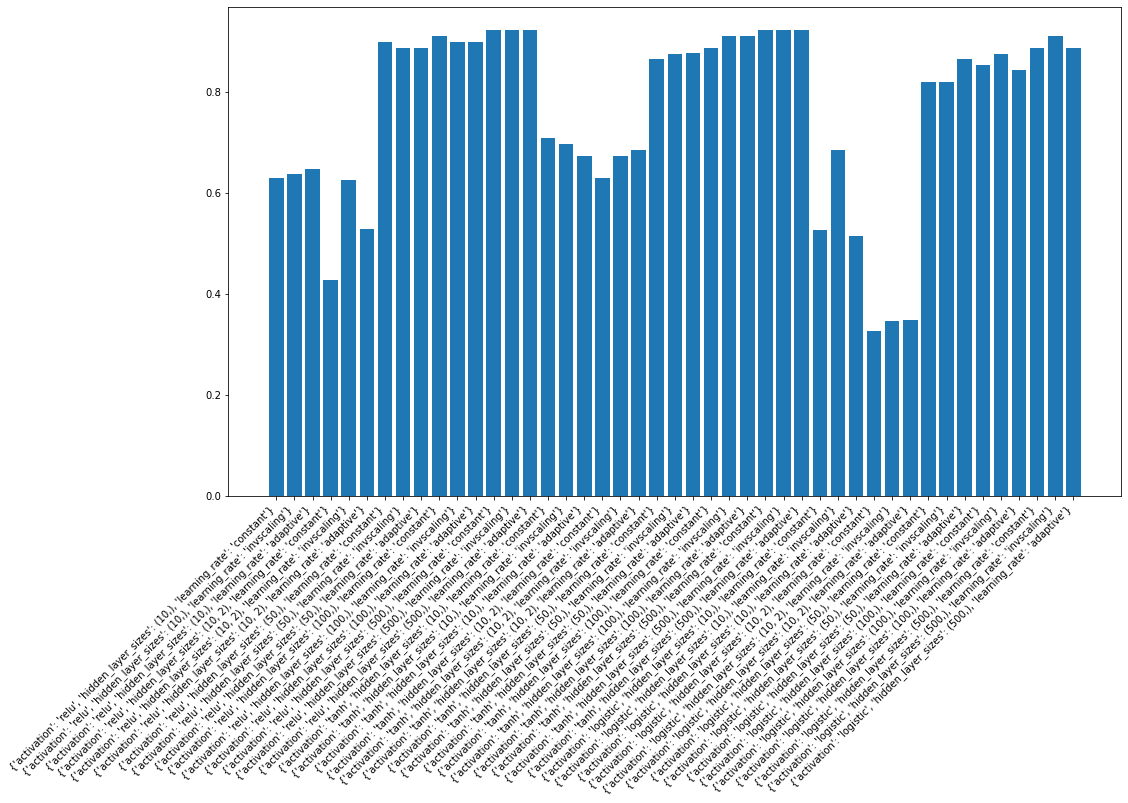

In [91]:
plot_performance(mlp_cv)

In [92]:
# create random forest model

rf = RandomForestClassifier()
rf_params = {
    'n_estimators': [5, 50, 250],
    'max_depth': [2, 4, 8, 16, 32, None]
}

rf_cv = GridSearchCV(rf, rf_params, cv=5)
rf_cv.fit(tr_features, tr_labels.values.ravel())

print_results(rf_cv)

Best Params: {'max_depth': 2, 'n_estimators': 250}
Test results:
0.91 (+/-0.097) for {'max_depth': 2, 'n_estimators': 5}
0.922 (+/-0.103) for {'max_depth': 2, 'n_estimators': 50}
0.933 (+/-0.108) for {'max_depth': 2, 'n_estimators': 250}
0.922 (+/-0.103) for {'max_depth': 4, 'n_estimators': 5}
0.933 (+/-0.108) for {'max_depth': 4, 'n_estimators': 50}
0.933 (+/-0.108) for {'max_depth': 4, 'n_estimators': 250}
0.922 (+/-0.103) for {'max_depth': 8, 'n_estimators': 5}
0.922 (+/-0.103) for {'max_depth': 8, 'n_estimators': 50}
0.933 (+/-0.108) for {'max_depth': 8, 'n_estimators': 250}
0.91 (+/-0.103) for {'max_depth': 16, 'n_estimators': 5}
0.91 (+/-0.097) for {'max_depth': 16, 'n_estimators': 50}
0.933 (+/-0.108) for {'max_depth': 16, 'n_estimators': 250}
0.91 (+/-0.097) for {'max_depth': 32, 'n_estimators': 5}
0.91 (+/-0.097) for {'max_depth': 32, 'n_estimators': 50}
0.91 (+/-0.097) for {'max_depth': 32, 'n_estimators': 250}
0.899 (+/-0.089) for {'max_depth': None, 'n_estimators': 5}
0.91 

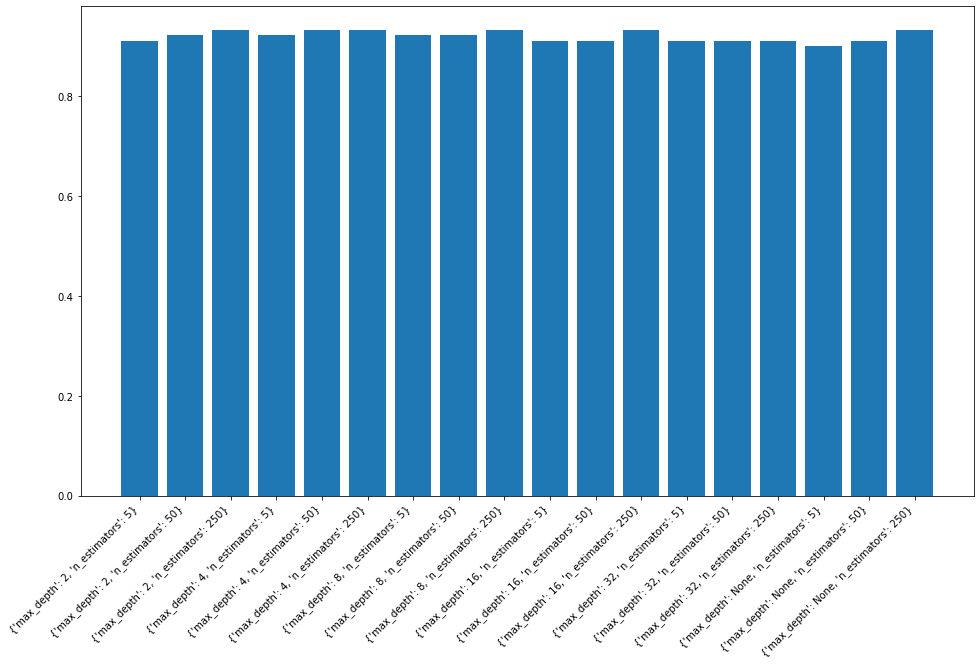

In [93]:
plot_performance(rf_cv)

In [94]:
# save best params as pkl

pkl_best_params(rf_cv, 'RF')

In [95]:
# create gradient boosting model

gbm = GradientBoostingClassifier()
gbm_params = {
    'n_estimators': [5, 50, 250, 500],
    'max_depth': [1, 2, 3, 5, 8],
    'learning_rate': [0.01, 0.1, 1, 10, 100]
}

gbm_cv = GridSearchCV(gbm, gbm_params, cv=5)
gbm_cv.fit(tr_features, tr_labels.values.ravel())

print_results(gbm_cv)

Best Params: {'learning_rate': 0.01, 'max_depth': 1, 'n_estimators': 250}
Test results:
0.754 (+/-0.209) for {'learning_rate': 0.01, 'max_depth': 1, 'n_estimators': 5}
0.922 (+/-0.103) for {'learning_rate': 0.01, 'max_depth': 1, 'n_estimators': 50}
0.933 (+/-0.108) for {'learning_rate': 0.01, 'max_depth': 1, 'n_estimators': 250}
0.922 (+/-0.103) for {'learning_rate': 0.01, 'max_depth': 1, 'n_estimators': 500}
0.754 (+/-0.209) for {'learning_rate': 0.01, 'max_depth': 2, 'n_estimators': 5}
0.922 (+/-0.103) for {'learning_rate': 0.01, 'max_depth': 2, 'n_estimators': 50}
0.922 (+/-0.103) for {'learning_rate': 0.01, 'max_depth': 2, 'n_estimators': 250}
0.91 (+/-0.103) for {'learning_rate': 0.01, 'max_depth': 2, 'n_estimators': 500}
0.766 (+/-0.228) for {'learning_rate': 0.01, 'max_depth': 3, 'n_estimators': 5}
0.91 (+/-0.097) for {'learning_rate': 0.01, 'max_depth': 3, 'n_estimators': 50}
0.888 (+/-0.086) for {'learning_rate': 0.01, 'max_depth': 3, 'n_estimators': 250}
0.899 (+/-0.095) for 

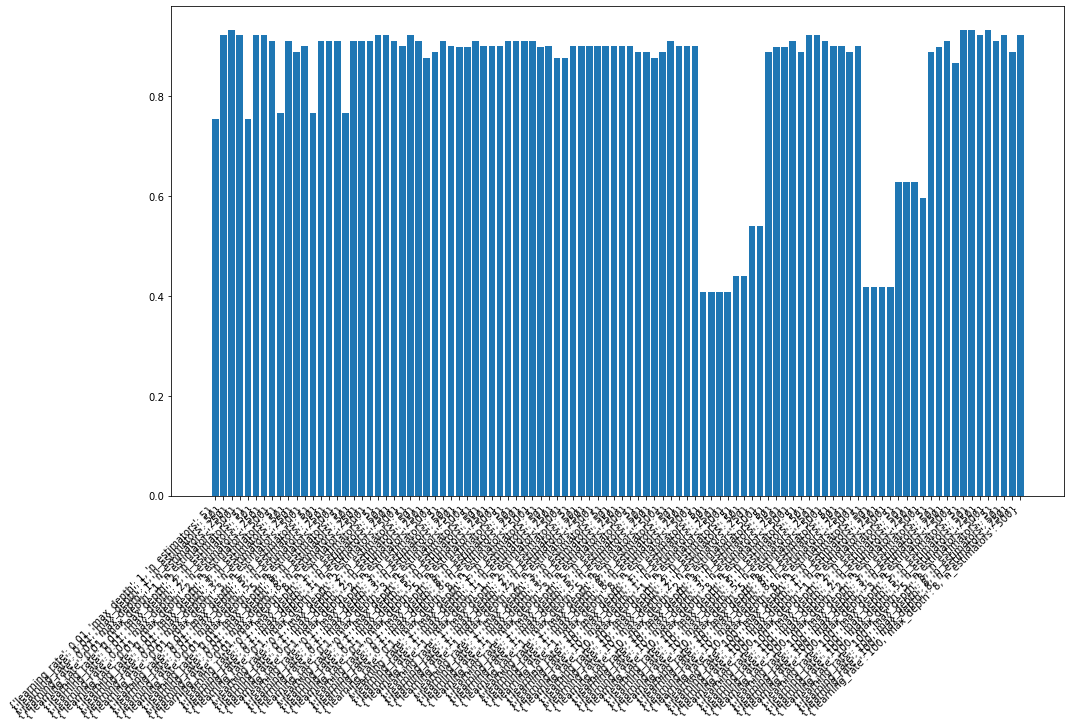

In [96]:
plot_performance(gbm_cv)

In [97]:
# save best params as pkl

pkl_best_params(gbm_cv, 'GBM')